In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import Easy_Risk_Kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [8]:
ind_return.shape

(1110, 30)

In [10]:
ind_nfirms.shape

(1110, 30)

In [11]:
ind_size.shape

(1110, 30)

In [12]:
ind_mktcap=ind_nfirms*ind_size
ind_mktcap.shape

(1110, 30)

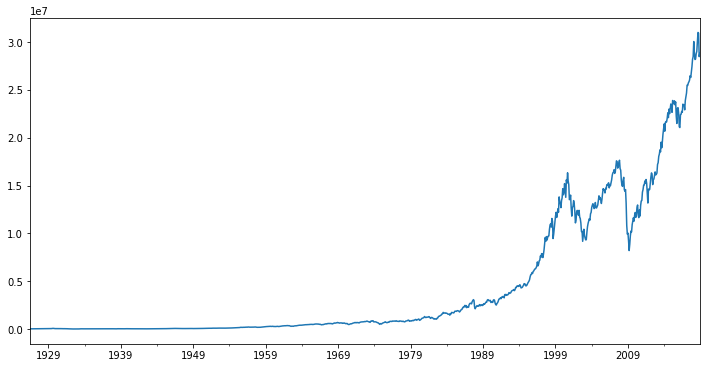

In [13]:
total_mktcap=ind_mktcap.sum(axis="columns")
total_mktcap.plot(figsize=(12,6))

In [14]:
ind_capweight=ind_mktcap.divide(total_mktcap, axis="rows")
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [15]:
ind_capweight["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

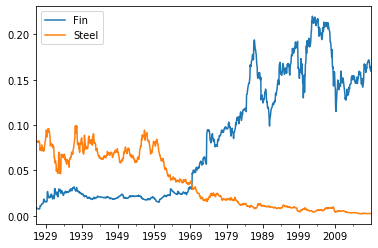

In [16]:
ind_capweight[["Fin","Steel"]].plot()

In [17]:
total_market_return=(ind_capweight*ind_return).sum(axis="columns")

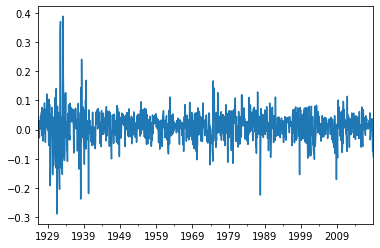

In [18]:
total_market_return.plot()

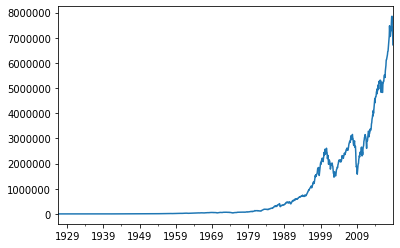

In [19]:
total_market_index=erk.drawdown(total_market_return).wealth
total_market_index.plot()

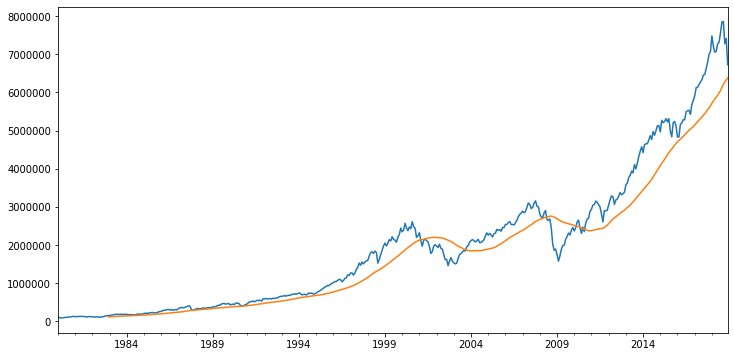

In [20]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot() #moving average of 36 monthes

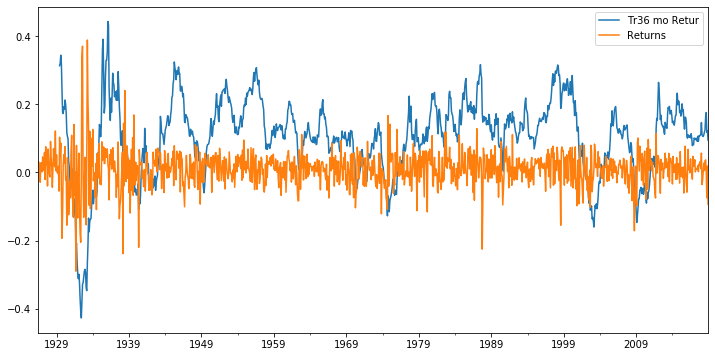

In [21]:
tmi_tr36rets= total_market_return.rolling(window=36).aggregate(erk.annualized_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label="Tr36 mo Retur", legend=True)
total_market_return.plot(label="Returns", legend=True)

In [17]:
#measure avg correlation across industries. is there a relation between final correlation and the actual retunrs

In [18]:
#Rolling correlation_ along with MultiIndexes and .groupby

In [24]:
ts_corr=ind_return.rolling(window=36).corr()
ts_corr.tail()
                                        

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [2]:
# food and meals have a correlation of 37%

In [25]:
ts_corr.index.names=['dates','industry']

In [26]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
dates   industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
dates   industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
dates   industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
dates   industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [27]:
ind_tr36corr = ts_corr.groupby(level='dates').apply(lambda cormat: cormat.values.mean())

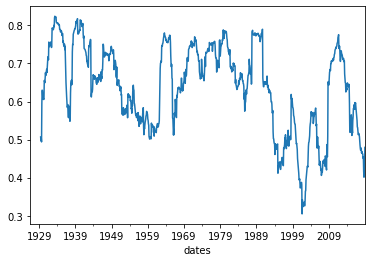

In [28]:
ind_tr36corr.plot()

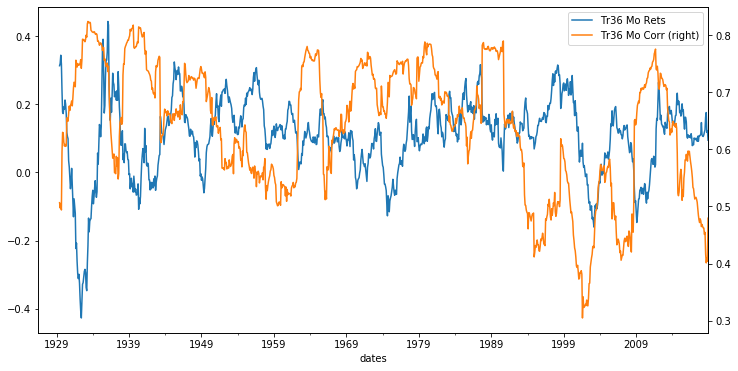

In [29]:
tmi_tr36rets.plot(label="Tr36 Mo Rets", figsize=(12,6),legend=True, ) #units of return
ind_tr36corr.plot(label="Tr36 Mo Corr", legend=True, secondary_y=True) #units of correlation# return of the left y axis

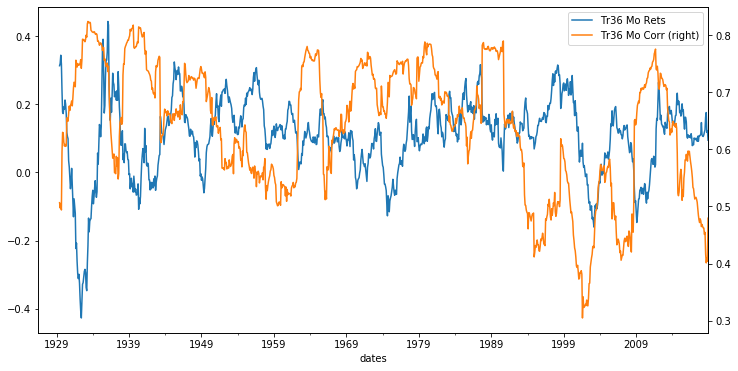

In [4]:
# When the market is falling down and when we are needing correlation between industries the most,
#correlation is it failing us.
# Diversificaion fail us when we most need it
#Orange line is the avg correlation across industries

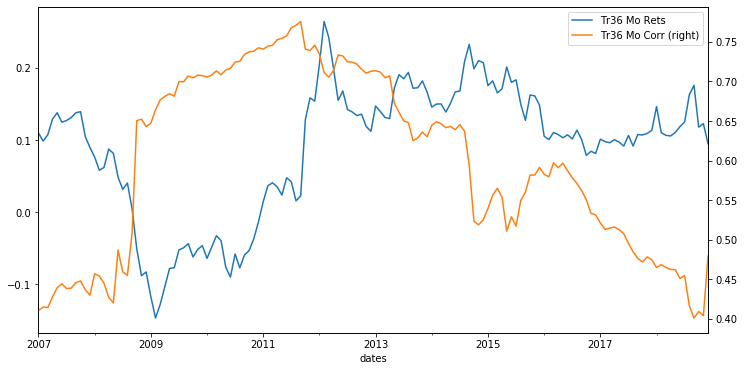

In [30]:
tmi_tr36rets["2007":].plot(label="Tr36 Mo Rets", figsize=(12,6),legend=True, ) #units of return
ind_tr36corr["2007":].plot(label="Tr36 Mo Corr", legend=True, secondary_y=True)#units of correlation# return of the left y axis


In [31]:
tmi_tr36rets.corr(ind_tr36corr) # correlation between returns and the average correlation not across industries

-0.28010065062884126

In [32]:
#diversification does not help you when market is crashing

In [33]:
#window and rolling indices, plot with them
